# Регуляризация

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Возьмём матрицу $diag(10^6, 10^{-6})$ и матрицу перехода в другой базис 
$C = 
\begin{pmatrix}
  1& 2\\
  0& 3
\end{pmatrix}$

Получим следующую матрицу:
$A = 
\begin{pmatrix}
  10^6& 2 \, \Bigr(10^6 + 10^{-6}\Bigl)\\
  0& 10^{-6}
\end{pmatrix}$

In [3]:
A = np.array([[1e6, 2 * (1e6 - 1e-6)], [0, 1e-6]])
values, vectors = np.linalg.eig(A)
b = vectors[0] + 10e-6 * vectors[1]

In [9]:
v1 = np.array([1, 0]).reshape(2, 1)
v2 = np.array([2, -1]).reshape(2, 1)

np.random.seed(2)
b = v1 + v2 * 1e-6 + np.random.randn(2, 1) * 1e-11

print("Матрица: ", A)
print("Столбец свободных членов: ", b)

Матрица:  [[1.e+06 2.e+06]
 [0.e+00 1.e-06]]
Столбец свободных членов:  [[ 1.00000200e+00]
 [-1.00000056e-06]]


In [10]:
x = np.array([2 + 10e-6, -1]).reshape(2, 1)

In [11]:
alphas = np.arange(-1e-11, 1e-11, 1e-14)
res = []

print(np.linalg.solve(A,b))
for alpha in alphas:
    res.append(np.linalg.norm(np.linalg.solve(A + alpha * np.eye(2),b) - x))

[[ 2.00000213]
 [-1.00000056]]


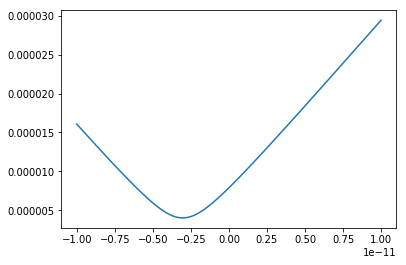

In [12]:
plt.plot(alphas, res)

In [13]:
print("Оптимальное значение альфа:", alphas[np.argmin(res)])

Оптимальное значение альфа: -3.0399999999998885e-12
